In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
pop = pd.read_csv("world_population.csv")

In [3]:
def rename_country(country):

    country_map = {'Central African Republic':'CAR',
                 'Czech Republic (Czechia)':'Czechia',
                 'DR Congo':'DRC',
                 "Côte d'Ivoire":'Ivory Coast',
                 'South Korea':'S. Korea',
                 'State of Palestine':'Palestine',
                 'Saint Kitts & Nevis':'Saint Kitts and Nevis',
                 'Saint Pierre & Miquelon':'Saint Pierre Miquelon',
                 'Sao Tome & Principe':'Sao Tome and Principe',
                 'Saint Barthelemy':'St. Barth',
                 'St. Vincent & Grenadines':'St. Vincent Grenadines',
                 'United Arab Emirates':'UAE',
                 'United Kingdom':'UK',
                 'United States':'USA',
                 'Holy See':'Vatican City'}
    
    return country_map.get(country, country)

In [4]:
pop['Country'] = pop['Country'].map(rename_country)
pop['Population'] = pop['Population'].map(lambda x:int(re.sub(r",","",x)))
pop['Land Area'] = pop['Land Area'].map(lambda x:int(re.sub(r",","",x)))

In [5]:
pop = pop.set_index("Country")
pop.columns = ['Population Rank','Population','Land Area']

In [6]:
pop.head(15)

,Population Rank,Population,Land Area
Country,,,
China,1,1439323776,9388211
India,2,1380004385,2973190
USA,3,331002651,9147420
Indonesia,4,273523615,1811570
Pakistan,5,220892340,770880
Brazil,6,212559417,8358140
Nigeria,7,206139589,910770
Bangladesh,8,164689383,130170
Russia,9,145934462,16376870


In [7]:
pop.sort_values("Land Area", ascending=False)

,Population Rank,Population,Land Area
Country,,,
Russia,9,145934462,16376870
China,1,1439323776,9388211
USA,3,331002651,9147420
Canada,39,37742154,9093510
Brazil,6,212559417,8358140
Australia,55,25499884,7682300
India,2,1380004385,2973190
Argentina,32,45195774,2736690
Kazakhstan,64,18776707,2699700


In [8]:
df = pd.read_csv("covid_data.csv")

In [9]:
df.Country.nunique()

215

In [10]:
df.Date.nunique()

74

In [11]:
df.head()

,Active Cases,Country,Date,New Cases,New Deaths,Serious Critical,Tot Cases per 1M pop,Tot Deaths per 1M pop,Total Cases,Total Deaths,Total Recovered
0,NaN,Afghanistan,2020-02-15,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
1,NaN,Afghanistan,2020-02-16,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
2,NaN,Afghanistan,2020-02-17,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
3,NaN,Afghanistan,2020-02-18,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
4,NaN,Afghanistan,2020-02-19,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN


In [12]:
df = df[['Date', 'Country', 'Total Cases', 'Total Deaths', 'Tot Deaths per 1M pop']]
df.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Death Rate']

In [13]:
key_countries = ['China', 'Italy', 'Spain', 'France', 'UK', 'USA','Peru','Russia','India','Chile','Pakistan']

In [14]:
cases = df.pivot(index='Country', columns='Date', values='Cases')
deaths = df.pivot(index='Country', columns='Date', values='Deaths')

In [15]:
cases = cases.fillna(0)
cases = cases.astype(int)
deaths = deaths.fillna(0)
deaths = deaths.astype(int)

In [16]:
cases.loc[key_countries]

Date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,68500,70548,72436,74185,74576,75465,76288,76936,77150,77658,78064,78497,78824,79251,79824,80026,80151,80270,80409,80552,80651,80695,80735,80754,80778,80793,80813,80824,80844,80860,80881,80894,80928,80967,81008,81054,81093,81171,81218,81285,81340,81394,81439,81470,81518,81554,81554,81620,81639,81669,81708,81740,81802,81865,81907,81953,82052,82160,82249,82295,82341,82692,82719,82735,82747,82758,82788,82798,82804,82816,82827,82830,82836,82858
Italy,3,3,3,3,3,4,21,79,157,229,323,470,655,889,1128,1701,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,15113,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675,199414,201505
Spain,2,2,2,2,2,2,2,2,2,3,9,13,25,33,58,84,120,165,228,282,401,525,674,1231,1695,2277,3146,5232,6391,7988,9942,11826,14769,18077,21571,25496,28768,35136,42058,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,174060,180659,184948,190839,194416,198674,200210,204178,208389,213024,219764,223759,226629,229422,232128
France,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,212,285,423,653,949,1209,1412,1784,2281,2876,3661,4499,5423,6633,7730,9134,10995,12612,14459,16018,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,89953,92839,98010,109069,112950,117749,124869,129654,132591,136779,143303,147863,165027,147969,151793,152894,155383,158050,159877,158183,159828,161488,162100,165842,165911
UK,9,9,9,9,9,9,9,9,13,13,13,13,16,20,23,36,39,51,87,116,164,209,278,321,383,460,590,798,1140,1391,1543,1950,2626,3269,3983,5018,5683,6650,8077,9529,11658,14543,17089,19522,22141,25150,29474,33718,38168,41903,47806,51608,55242,60733,65077,73758,78991,84279,88621,93873,98476,103093,108692,114217,120067,124743,129044,133495,138078,143464,148377,152840,157149,161145
USA,15,15,15,15,15,15,35,35,35,53,57,60,60,63,68,75,100,124,158,221,319,435,541,704,994,1301,1630,2183,2770,3613,4596,6346,9296,13865,19497,24345,33745,44056,54867,68472,85594,104205,123750,142178,164253,188578,215300,245193,277467,311635,336830,367629,400540,435128,468887,502876,532879,560433,587155,614211,644089,678144,710021,738913,764265,792913,819175,849092,886709,925232,960896,987322,1010507,1035765
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,7,9,11,17,22,38,43,71,86,117,145,234,263,318,363,395,416,480,580,635,671,852,950,1065,1323,1414,1595,1746,2281,2561,2954,4342,5256,5897,6848,7519,9784,10303,11475,12491,13489,14420,15628,16325,17837,19250,20914,21648,25331,27517,28699,31190
Russia,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,7,13,14,17,20,20,28,34,45,59,63,93,114,147,199,253,306,367,438,495,658,840,1036,1264,1534,1836,2337,2777,3548,4149,4731,5389,6343,7497,8672,10131,11917,13584,15770,18328,21102,24490,27938,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558
India,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,6,7,29,30,31,

In [17]:
cases.loc['USA']

Date
2020-02-15         15
2020-02-16         15
2020-02-17         15
2020-02-18         15
2020-02-19         15
2020-02-20         15
2020-02-21         35
2020-02-22         35
2020-02-23         35
2020-02-24         53
2020-02-25         57
2020-02-26         60
2020-02-27         60
2020-02-28         63
2020-02-29         68
2020-03-01         75
2020-03-02        100
2020-03-03        124
2020-03-04        158
2020-03-05        221
2020-03-06        319
2020-03-07        435
2020-03-08        541
2020-03-09        704
2020-03-10        994
2020-03-11       1301
2020-03-12       1630
2020-03-13       2183
2020-03-14       2770
2020-03-15       3613
2020-03-16       4596
2020-03-17       6346
2020-03-18       9296
2020-03-19      13865
2020-03-20      19497
2020-03-21      24345
2020-03-22      33745
2020-03-23      44056
2020-03-24      54867
2020-03-25      68472
2020-03-26      85594
2020-03-27     104205
2020-03-28     123750
2020-03-29     142178
2020-03-30     164253
2020-

In [18]:
deaths.loc[key_countries]

Date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,1665,1770,1868,2004,2118,2236,2345,2442,2592,2663,2715,2744,2788,2835,2870,2912,2943,2981,3012,3042,3070,3097,3119,3136,3158,3169,3176,3189,3199,3213,3226,3237,3245,3248,3255,3261,3270,3277,3281,3287,3292,3295,3300,3304,3305,3312,3312,3322,3326,3329,3331,3331,3333,3335,3336,3339,3339,3341,3341,3342,3342,4632,4632,4632,4632,4632,4632,4632,4632,4632,4632,4633,4633,4633
Italy,0,0,0,0,0,0,1,2,3,7,11,12,17,21,29,41,52,79,107,148,197,233,366,463,631,827,1016,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977,27359
Spain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,8,10,17,30,36,55,86,133,196,294,342,533,638,831,1093,1381,1772,2311,2991,3647,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447,16081,16606,17209,17756,18255,18812,19315,20002,20639,20453,20852,21282,21717,22157,22524,22902,23190,23521,23822
France,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,4,4,7,9,16,19,30,33,48,61,79,91,127,148,175,264,372,450,562,674,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560,8078,8911,10328,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681,19323,19718,20265,20796,21340,21856,22245,22614,22856,23293,23660
UK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,5,6,8,10,11,21,35,55,71,104,144,177,233,281,335,422,465,578,759,1019,1228,1408,1789,2352,2921,3605,4313,4934,5373,6159,7097,7978,8958,9875,10612,11329,12107,12868,13729,14576,15464,16060,16509,17337,18100,18738,19506,20319,20732,21092,21678
USA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,9,11,12,15,19,22,26,30,38,41,48,57,69,87,110,150,206,255,301,414,556,782,1032,1300,1701,2227,2484,3167,4055,5110,6088,7402,8454,9618,10941,12857,14795,16697,18747,20577,22115,23644,26064,28529,34641,37158,39015,40565,42517,45343,47681,50243,52193,54265,55415,56803,59266
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,5,5,7,9,9,11,16,18,24,30,47,55,61,73,83,92,107,121,138,169,181,193,216,230,254,274,300,348,400,445,484,530,572,634,700,728,782,854
Russia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,3,4,4,8,9,17,24,30,34,43,45,47,58,63,76,94,106,130,148,170,198,232,273,313,361,405,456,513,555,615,681,747,794,867
India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,3,3,4,5,5,7,10,11,12,20,20,24,27,32,45,58,72,86,99,118,136,160,178,227,249,288,331,358,393,422,448,486,521,559,592,645,681,722,780,825,884,939,1008


In [19]:
deaths.loc['UK']

Date
2020-02-15        0
2020-02-16        0
2020-02-17        0
2020-02-18        0
2020-02-19        0
2020-02-20        0
2020-02-21        0
2020-02-22        0
2020-02-23        0
2020-02-24        0
2020-02-25        0
2020-02-26        0
2020-02-27        0
2020-02-28        0
2020-02-29        0
2020-03-01        0
2020-03-02        0
2020-03-03        0
2020-03-04        0
2020-03-05        1
2020-03-06        2
2020-03-07        2
2020-03-08        3
2020-03-09        5
2020-03-10        6
2020-03-11        8
2020-03-12       10
2020-03-13       11
2020-03-14       21
2020-03-15       35
2020-03-16       55
2020-03-17       71
2020-03-18      104
2020-03-19      144
2020-03-20      177
2020-03-21      233
2020-03-22      281
2020-03-23      335
2020-03-24      422
2020-03-25      465
2020-03-26      578
2020-03-27      759
2020-03-28     1019
2020-03-29     1228
2020-03-30     1408
2020-03-31     1789
2020-04-01     2352
2020-04-02     2921
2020-04-03     3605
2020-04-04     

In [20]:
def get_new(df):
    
    dates = df.columns.to_list()
    new_df = pd.DataFrame((df[dates[1]] - df[dates[0]]))
    new_df.columns = [dates[1]]
    
    for i in range(len(dates)-2):
        new_df[dates[i+2]] = df[dates[i+2]] - df[dates[i+1]]
        
    return new_df

In [21]:
new_cases = get_new(cases)
new_cases.loc[key_countries]

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,2048,1888,1749,391,889,823,648,214,508,406,433,327,427,573,202,125,119,139,143,99,44,40,19,24,15,20,11,20,16,21,13,34,39,41,46,39,78,47,67,55,54,45,31,48,36,0,66,19,30,39,32,62,63,42,46,99,108,89,46,46,351,27,16,12,11,30,10,6,12,11,3,6,22
Italy,0,0,0,0,1,17,58,78,72,94,147,185,234,239,573,335,466,587,769,778,1247,1492,1797,977,2313,2651,2547,3497,3590,3233,3526,4207,5322,5986,6557,5560,4789,5249,5210,6203,5909,5974,5217,4050,4053,4782,4668,4585,4805,4316,3599,3039,3836,4204,3951,4694,4092,3153,2972,2667,3786,3493,3491,3047,2256,2729,3370,2646,3021,2357,2324,1739,2091
Spain,0,0,0,0,0,0,0,0,1,6,4,12,8,25,26,36,45,63,54,119,124,149,557,464,582,869,2086,1159,1597,1954,1884,2943,3308,3494,3925,3272,6368,6922,7457,8271,7933,7516,6875,7846,7967,8195,7947,7134,6969,5478,5029,5267,6278,5002,5051,4754,3804,3268,3961,6599,4289,5891,3577,4258,1536,3968,4211,4635,6740,3995,2870,2793,2706
France,0,0,0,0,0,0,0,0,0,2,4,20,19,43,30,61,21,73,138,230,296,260,203,372,497,595,785,838,924,1210,1097,1404,1861,1617,1847,1559,3838,2448,2929,3922,3809,4611,2599,4376,7578,4861,2116,5233,25615,2886,5171,11059,3881,4799,7120,4785,2937,4188,6524,4560,17164,-17058,3824,1101,2489,2667,1827,-1694,1645,1660,612,3742,69
UK,0,0,0,0,0,0,0,4,0,0,0,3,4,3,13,3,12,36,29,48,45,69,43,62,77,130,208,342,251,152,407,676,643,714,1035,665,967,1427,1452,2129,2885,2546,2433,2619,3009,4324,4244,4450,3735,5903,3802,3634,5491,4344,8681,5233,5288,4342,5252,4603,4617,5599,5525,5850,4676,4301,4451,4583,5386,4913,4463,4309,3996
USA,0,0,0,0,0,20,0,0,18,4,3,0,3,5,7,25,24,34,63,98,116,106,163,290,307,329,553,587,843,983,1750,2950,4569,5632,4848,9400,10311,10811,13605,17122,18611,19545,18428,22075,24325,26722,29893,32274,34168,25195,30799,32911,34588,33759,33989,30003,27554,26722,27056,29878,34055,31877,28892,25352,28648,26262,29917,37617,38523,35664,26426,23185,25258
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,1,2,2,6,5,16,5,28,15,31,28,89,29,55,45,32,21,64,100,55,36,181,98,115,258,91,181,151,535,280,393,1388,914,641,951,671,2265,519,1172,1016,998,931,1208,697,1512,1413,1664,734,3683,2186,1182,2491
Russia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,6,1,3,3,0,8,6,11,14,4,30,21,33,52,54,53,61,71,57,163,182,196,228,270,302,501,440,771,601,582,658,954,1154,1175,1459,1786,1667,2186,2558,2774,3388,3448,4070,4785,6060,4268,5642,5236,4774,5849,5966,6361,6198,6411
India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,22,1,1,3,6,7,15,0,12,8,18,14,15,14,26,25,55,83,64,103,63,102,69,154,100,37,227,339,408,545,516,529,701,489,578,560,809,875,846,759,1248,1034,969,974,922,2013,1250,986,1510,1339,2052,1028,1966,1468,1487,1873


In [22]:
new_deaths = get_new(deaths)
new_deaths.loc[key_countries]

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,105,98,136,114,118,109,97,150,71,52,29,44,47,35,42,31,38,31,30,28,27,22,17,22,11,7,13,10,14,13,11,8,3,7,6,9,7,4,6,5,3,5,4,1,7,0,10,4,3,2,0,2,2,1,3,0,2,0,1,0,1290,0,0,0,0,0,0,0,0,0,1,0,0
Italy,0,0,0,0,0,1,1,1,4,4,1,5,4,8,12,11,27,28,41,49,36,133,97,168,196,189,250,175,368,349,345,475,427,627,793,651,601,743,683,712,919,889,756,812,837,727,760,766,681,525,636,604,542,610,570,619,431,566,602,578,525,575,482,433,454,534,437,464,420,415,260,333,382
Spain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,2,7,13,6,19,31,47,63,98,48,191,105,193,262,288,391,539,680,656,718,773,844,821,913,748,923,961,850,749,694,700,704,747,655,634,525,603,547,499,557,503,687,637,-186,399,430,435,440,367,378,288,331,301
France,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,3,2,7,3,11,3,15,13,18,12,36,21,27,89,108,78,112,112,186,240,231,365,299,319,292,418,499,509,1355,1120,1053,518,833,1417,541,1341,987,635,561,574,762,1438,753,761,642,395,547,531,544,516,389,369,242,437,367
UK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,1,2,2,1,10,14,20,16,33,40,33,56,48,54,87,43,113,181,260,209,180,381,563,569,684,708,621,439,786,938,881,980,917,737,717,778,761,861,847,888,596,449,828,763,638,768,813,413,360,586
USA,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,3,2,1,3,4,3,4,4,8,3,7,9,12,18,23,40,56,49,46,113,142,226,250,268,401,526,257,683,888,1055,978,1314,1052,1164,1323,1916,1938,1902,2050,1830,1538,1529,2420,2465,6112,2517,1857,1550,1952,2826,2338,2562,1950,2072,1150,1388,2463
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,0,2,2,0,2,5,2,6,6,17,8,6,12,10,9,15,14,17,31,12,12,23,14,24,20,26,48,52,45,39,46,42,62,66,28,54,72
Russia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,4,1,8,7,6,4,9,2,2,11,5,13,18,12,24,18,22,28,34,41,40,48,44,51,57,42,60,66,66,47,73
India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,2,3,1,1,8,0,4,3,5,13,13,14,14,13,19,18,24,18,49,22,39,43,27,35,29,26,38,35,38,33,53,36,41,58,45,59,55,69


In [23]:
def get_new_as_pct_total(df, new_df):
    
    dates = df.columns.to_list()

    inc_df = pd.DataFrame((new_df[dates[1]] / df[dates[0]]))
    inc_df.columns = [dates[1]]    
    
    for i in range(len(dates)-2):
        inc_df[dates[i+2]] = new_df[dates[i+2]] / df[dates[i+1]]    
    
    return inc_df

In [24]:
new_cases_inc = get_new_as_pct_total(cases, new_cases)
100*round(new_cases_inc.loc[key_countries],3)

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,3.0,2.7,2.4,0.5,1.2,1.1,0.8,0.3,0.7,0.5,0.6,0.4,0.5,0.7,0.3,0.2,0.1,0.2,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Italy,0.0,0.0,0.0,0.0,33.3,425.0,276.2,98.7,45.9,41.0,45.5,39.4,35.7,26.9,50.8,19.7,22.9,23.5,24.9,20.2,26.9,25.4,24.4,10.7,22.8,21.3,16.9,19.8,17.0,13.1,12.6,13.4,14.9,14.6,13.9,10.4,8.1,8.2,7.5,8.3,7.3,6.9,5.6,4.1,4.0,4.5,4.2,4.0,4.0,3.5,2.8,2.3,2.8,3.0,2.8,3.2,2.7,2.0,1.9,1.6,2.3,2.1,2.0,1.7,1.3,1.5,1.8,1.4,1.6,1.2,1.2,0.9,1.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,200.0,44.4,92.3,32.0,75.8,44.8,42.9,37.5,38.2,23.7,42.2,30.9,28.4,82.6,37.7,34.3,38.2,66.3,22.2,25.0,24.5,18.9,24.9,22.4,19.3,18.2,12.8,22.1,19.7,17.7,16.7,13.7,11.4,9.4,9.8,9.1,8.5,7.6,6.4,5.8,4.3,3.8,3.9,4.4,3.4,3.3,3.0,2.3,2.0,2.3,3.8,2.4,3.2,1.9,2.2,0.8,2.0,2.1,2.2,3.2,1.8,1.3,1.2,1.2
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7,28.6,111.1,50.0,75.4,30.0,46.9,11.0,34.4,48.4,54.4,45.3,27.4,16.8,26.3,27.9,26.1,27.3,22.9,20.5,22.3,16.5,18.2,20.4,14.7,14.6,10.8,24.0,12.3,13.1,15.5,13.1,14.0,6.9,10.9,17.0,9.3,3.7,8.9,39.8,3.2,5.6,11.3,3.6,4.2,6.0,3.8,2.3,3.2,4.8,3.2,11.6,-10.3,2.6,0.7,1.6,1.7,1.2,-1.1,1.0,1.0,0.4,2.3,0.0
UK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.4,0.0,0.0,0.0,23.1,25.0,15.0,56.5,8.3,30.8,70.6,33.3,41.4,27.4,33.0,15.5,19.3,20.1,28.3,35.3,42.9,22.0,10.9,26.4,34.7,24.5,21.8,26.0,13.3,17.0,21.5,18.0,22.3,24.7,17.5,14.2,13.4,13.6,17.2,14.4,13.2,9.8,14.1,8.0,7.0,9.9,7.2,13.3,7.1,6.7,5.2,5.9,4.9,4.7,5.4,5.1,5.1,3.9,3.4,3.4,3.4,3.9,3.4,3.0,2.8,2.5
USA,0.0,0.0,0.0,0.0,0.0,133.3,0.0,0.0,51.4,7.5,5.3,0.0,5.0,7.9,10.3,33.3,24.0,27.4,39.9,44.3,36.4,24.4,30.1,41.2,30.9,25.3,33.9,26.9,30.4,27.2,38.1,46.5,49.2,40.6,24.9,38.6,30.6,24.5,24.8,25.0,21.7,18.8,14.9,15.5,14.8,14.2,13.9,13.2,12.3,8.1,9.1,9.0,8.6,7.8,7.2,6.0,5.2,4.8,4.6,4.9,5.3,4.7,4.1,3.4,3.7,3.3,3.7,4.4,4.3,3.9,2.8,2.3,2.5
Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,500.0,16.7,28.6,22.2,54.5,29.4,72.7,13.2,65.1,21.1,36.0,23.9,61.4,12.4,20.9,14.2,8.8,5.3,15.4,20.8,9.5,5.7,27.0,11.5,12.1,24.2,6.9,12.8,9.5,30.6,12.3,15.3,47.0,21.1,12.2,16.1,9.8,30.1,5.3,11.4,8.9,8.0,6.9,8.4,4.5,9.3,7.9,8.6,3.5,17.0,8.6,4.3,8.7
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,133.3,85.7,7.7,21.4,17.6,0.0,40.0,21.4,32.4,31.1,6.8,47.6,22.6,28.9,35.4,27.1,20.9,19.9,19.3,13.0,32.9,27.7,23.3,22.0,21.4,19.7,27.3,18.8,27.8,16.9,14.0,13.9,17.7,18.2,15.7,16.8,17.6,14.0,16.1,16.2,15.1,16.1,14.1,14.6,14.9,16.5,10.0,12.0,9.9,8.2,9.3,8.7,8.5,7.7,7.4
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,16.7,314.3,3.4,3.3,9.7,17.6,17.5,31.9,0.0,19.4,10.8,22.0,14.0,13.2,10.9,18.2,14.8,28.4,33.3,19.3,26.0,12.6,18.1,10.4,21.0,11.3,3.7,22.2,27.1,25.7,27.3,20.3,17.3,19.5,11.4,12.1,10.5,13.7,13.0,11.1,9.0,13.6,9.9,8.4,7.8,6.9,14.0,7.6,5.6,8.1,6.7,9.6,4.4,8.0,5.5,5.3,6.4


In [25]:
new_death_inc = get_new_as_pct_total(deaths, new_deaths)
100*round(new_death_inc.loc[key_countries],3)

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,6.3,5.5,7.3,5.7,5.6,4.9,4.1,6.1,2.7,2.0,1.1,1.6,1.7,1.2,1.5,1.1,1.3,1.0,1.0,0.9,0.9,0.7,0.5,0.7,0.3,0.2,0.4,0.3,0.4,0.4,0.3,0.2,0.1,0.2,0.2,0.3,0.2,0.1,0.2,0.2,0.1,0.2,0.1,0.0,0.2,0.0,0.3,0.1,0.1,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,38.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Italy,NaN,NaN,NaN,NaN,NaN,inf,100.0,50.0,133.3,57.1,9.1,41.7,23.5,38.1,41.4,26.8,51.9,35.4,38.3,33.1,18.3,57.1,26.5,36.3,31.1,22.9,24.6,13.8,25.5,19.3,16.0,19.0,14.3,18.4,19.7,13.5,11.0,12.2,10.0,9.5,11.2,9.7,7.5,7.5,7.2,5.8,5.8,5.5,4.6,3.4,4.0,3.7,3.2,3.5,3.1,3.3,2.2,2.8,2.9,2.7,2.4,2.6,2.1,1.9,1.9,2.2,1.8,1.8,1.6,1.6,1.0,1.2,1.4
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,100.0,50.0,166.7,25.0,70.0,76.5,20.0,52.8,56.4,54.7,47.4,50.0,16.3,55.8,19.7,30.3,31.5,26.3,28.3,30.4,29.4,21.9,19.7,17.7,16.4,13.7,13.4,9.7,10.9,10.2,8.2,6.7,5.8,5.5,5.3,5.3,4.4,4.1,3.3,3.6,3.2,2.8,3.1,2.7,3.6,3.2,-0.9,2.0,2.1,2.0,2.0,1.7,1.7,1.3,1.4,1.3
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,50.0,33.3,0.0,75.0,28.6,77.8,18.8,57.9,10.0,45.5,27.1,29.5,15.2,39.6,16.5,18.2,50.9,40.9,21.0,24.9,19.9,27.6,27.9,21.0,27.4,17.6,16.0,12.6,16.0,16.5,14.4,33.6,20.8,16.2,6.9,10.3,15.9,5.2,12.3,8.1,4.8,4.1,4.0,5.1,9.1,4.4,4.2,3.4,2.0,2.8,2.6,2.6,2.4,1.8,1.7,1.1,1.9,1.6
UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,100.0,0.0,50.0,66.7,20.0,33.3,25.0,10.0,90.9,66.7,57.1,29.1,46.5,38.5,22.9,31.6,20.6,19.2,26.0,10.2,24.3,31.3,34.3,20.5,14.7,27.1,31.5,24.2,23.4,19.6,14.4,8.9,14.6,15.2,12.4,12.3,10.2,7.5,6.8,6.9,6.3,6.7,6.2,6.1,3.9,2.8,5.0,4.4,3.5,4.1,4.2,2.0,1.7,2.8
USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,0.0,500.0,50.0,22.2,9.1,25.0,26.7,15.8,18.2,15.4,26.7,7.9,17.1,18.8,21.1,26.1,26.4,36.4,37.3,23.8,18.0,37.5,34.3,40.6,32.0,26.0,30.8,30.9,11.5,27.5,28.0,26.0,19.1,21.6,14.2,13.8,13.8,17.5,15.1,12.9,12.3,9.8,7.5,6.9,10.2,9.5,21.4,7.3,5.0,4.0,4.8,6.6,5.2,5.4,3.9,4.0,2.1,2.5,4.3
Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,300.0,25.0,0.0,0.0,40.0,28.6,0.0,22.2,45.5,12.5,33.3,25.0,56.7,17.0,10.9,19.7,13.7,10.8,16.3,13.1,14.0,22.5,7.1,6.6,11.9,6.5,10.4,7.9,9.5,16.0,14.9,11.2,8.8,9.5,7.9,10.8,10.4,4.0,7.4,9.2
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,0.0,0.0,0.0,0.0,0.0,200.0,0.0,33.3,0.0,100.0,12.5,88.9,41.2,25.0,13.3,26.5,4.7,4.4,23.4,8.6,20.6,23.7,12.8,22.6,13.8,14.9,16.5,17.2,17.7,14.7,15.3,12.2,12.6,12.5,8.2,10.8,10.7,9.7,6.3,9.2
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,100.0,0.0,0.0,0.0,50.0,0.0,33.3,25.0,0.0,40.0,42.9,10.0,9.1,66.7,0.0,20.0,12.5,18.5,40.6,28.9,24.1,19.4,15.1,19.2,15.3,17.6,11.2,27.5,9.7,15.7,14.9,8.2,9.8,7.4,6.2,8.5,7.2,7.3,5.9,9.0,5.6,6.0,8.0,5.8,7.2,6.2,7.3


In [26]:
cases_ranks = pd.DataFrame([i+1 for i in range(100)])
deaths_ranks = pd.DataFrame([i+1 for i in range(100)])
cases_ranks.columns = ['Rank']
deaths_ranks.columns = ['Rank']

for date in cases.columns:
    
    top100_cases = cases[date][cases[date]>0].sort_values(ascending=False).iloc[:100].index.to_list()
    if len(top100_cases) < 100:
        top100_cases = top100_cases + [None]*(100-len(top100_cases))
    cases_ranks[date] = top100_cases
    
    top100_deaths = deaths[date][deaths[date]>0].sort_values(ascending=False).iloc[:100].index.to_list()
    if len(top100_deaths) < 100:
        top100_deaths = top100_deaths + [None]*(100-len(top100_deaths))    
    deaths_ranks[date] = top100_deaths
    
cases_ranks = cases_ranks.set_index("Rank")
deaths_ranks = deaths_ranks.set_index("Rank")

In [27]:
cases_ranks = cases_ranks.fillna("N/A")
cases_ranks

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
2,Singapore,Singapore,Singapore,Singapore,Japan,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,China,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
3,Hong Kong,Japan,Japan,Japan,Singapore,Japan,Japan,Japan,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Iran,Italy,S. Korea,S. Korea,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Spain,Spain,USA,USA,USA,USA,Italy,China,China,China,Spain,Spain,Spain,Spain,Spain,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy
4,Japan,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Singapore,Singapore,Singapore,Japan,Japan,Japan,Japan,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Italy,Iran,Iran,Iran,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,Spain,Spain,Spain,Spain,Germany,USA,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,China,China,China,Germany,Germany,Germany,Germany,Germany,France,Germany,Germany,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France
5,Thailand,Thailand,Thailand,Thailand,S. Korea,Hong Kong,Hong Kong,Italy,Singapore,Singapore,Iran,Iran,Japan,Japan,Japan,Japan,Japan,Japan,Japan,Germany,Germany,France,France,France,France,France,Spain,Spain,Spain,Spain,S. Korea,Germany,Germany,Germany,Iran,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,China,China,France,France,France,Germany,France,France,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,UK
6,S. Korea,S. Korea,S. Korea,S. Korea,Thailand,Thailand,Thailand,Hong Kong,Hong Kong,Hong Kong,Singapore,Singapore,Singapore,Singapore,Singapore,Germany,France,France,France,France,France,Germany,Germany,Spain,Spain,Spain,France,Germany,Germany,Germany,Germany,S. Korea,USA,USA,USA,Iran,Iran,Iran,Iran,Iran,Iran,France,France,France,France,France,France,France,France,China,China,China,China,China,China,China,China,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,Germany
7,Malaysia,Malaysia,Malaysia,Malaysia,Taiwan,Taiwan,USA,Thailand,Iran,Iran,Hong Kong,Hong Kong,Hong Kong,Hong Kong,France,France,Germany,Germany,Germany,Japan,Japan,Spain,Spain,Germany,Germany,Germany,Germany,France,France,France,F

In [28]:
deaths_ranks = deaths_ranks.fillna("N/A")
deaths_ranks

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
2,Philippines,Taiwan,Taiwan,Taiwan,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,China,China,China,China,China,China,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,USA,USA,USA,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy
3,Japan,Philippines,Philippines,Philippines,Hong Kong,Hong Kong,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,Italy,Italy,Italy,Italy,Italy,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Spain,Spain,Spain,China,China,China,China,China,China,USA,USA,USA,USA,USA,USA,USA,USA,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
4,Hong Kong,Japan,Japan,Japan,Taiwan,Taiwan,Hong Kong,Italy,Italy,Italy,Italy,Italy,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,USA,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France
5,France,Hong Kong,Hong Kong,Hong Kong,Philippines,S. Korea,Taiwan,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Japan,Japan,Japan,Japan,Japan,USA,USA,USA,USA,USA,USA,USA,France,Spain,Spain,S. Korea,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,France,China,China,China,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK
6,N/A,France,France,France,Japan,Philippines,Philippines,Taiwan,Taiwan,Taiwan,Taiwan,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Japan,Japan,Japan,France,France,France,France,Spain,France,France,France,S. Korea,S. Korea,S. Korea,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,Iran,Iran,Iran,Iran,China,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
7,N/A,N/A,N/A,N/A,France,Japan,Japan,Philippines,Philippines,Philippines,Philippines,France,France,France,France,France,France,France,France,Japan,Spain,Spain,Spain,USA,USA,USA,USA,USA,USA,USA,S. Korea,S. Korea,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK,Iran,China,China,China,China,China,China,China,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Iran,Iran,Iran,Iran,Iran,Iran,Germany,Ger

In [29]:
cases_ranks.to_csv("cases_ranks.csv")
deaths_ranks.to_csv("deaths_ranks.csv")

In [30]:
dates = cases_ranks.columns

In [31]:
def get_cases_daily_rank(row, date):
    country = row.Country
    top50 = {v:k for k,v in cases_ranks[date].to_dict().items()}
    return top50.get(country)

In [32]:
def get_deaths_daily_rank(row, date):
    country = row.Country
    top50 = {v:k for k,v in deaths_ranks[date].to_dict().items()}
    return top50.get(country)

In [33]:
dates

Index(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
       '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',

In [34]:
cases_countries = pd.DataFrame(cases.index)
for date in dates:
    cases_countries[date] = cases_countries.apply(get_cases_daily_rank, date=date, axis=1)
cases_countries = cases_countries.set_index('Country')

In [35]:
cases_countries = pd.merge(cases_countries, pop['Population Rank'], left_index=True, right_index=True)
cases_countries[[c for c in cases_countries.columns if c < '2020-02-27']] = cases_countries[[c for c in cases_countries.columns if c < '2020-02-27']].fillna("N/A")
cases_countries = cases_countries.fillna("-")

In [36]:
cases_countries.loc[key_countries].sort_values('Population Rank')

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,Population Rank
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,4,4,4,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,9,9,9,9,9,9,9,10,10,1
India,20,20,20,20,19,20,21,21,21,21,25,25,30,34,38,44,40,42,25,29,30,31,31,33,31,36,37,40,43,43,45,45,46,49,48,42,42,41,40,41,41,41,41,41,40,36,35,33,31,29,27,26,24,24,21,22,22,22,22,19,20,18,18,17,17,17,17,17,16,16,16,16,15,15,2
USA,12,12,12,12,11,12,7,8,9,8,8,8,8,9,10,11,10,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,6,6,6,4,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
Pakistan,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,32,36,37,34,39,43,45,49,55,56,58,61,54,54,56,64,62,65,59,34,31,30,28,27,28,29,28,29,30,31,31,31,32,33,34,34,35,34,34,34,31,31,33,33,33,33,33,33,33,31,29,31,30,30,29,29,29,29,29,28,29,27,27,5
Russia,22,22,22,22,23,22,22,22,22,26,28,28,35,42,44,49,48,51,57,48,46,46,44,47,52,50,49,49,49,51,50,51,49,48,47,46,44,44,45,42,39,38,33,33,32,27,27,24,24,22,22,20,20,19,18,17,17,16,15,15,15,14,12,12,10,10,10,10,10,10,10,10,9,8,9
UK,15,16,16,16,15,16,19,19,15,16,18,19,20,18,18,16,16,14,13,12,11,11,11,11,12,15,15,14,10,10,10,10,10,10,10,10,10,10,10,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,21
France,13,13,13,13,13,13,15,16,17,17,16,16,12,10,7,7,6,6,6,6,6,5,5,5,5,5,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,5,5,5,4,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,22
Italy,19,19,19,19,18,19,10,5,3,3,3,3,3,3,3,3,3,3,3,3,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,23
Spain,21,21,21,21,22,23,23,23,23,23,22,20,15,15,11,10,8,8,8,8,8,7,7,6,6,6,5,5,5,5,4,4,4,4,3,3,4,4,4,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,30


In [37]:
deaths_countries = pd.DataFrame(deaths.index)
for date in dates:
    deaths_countries[date] = deaths_countries.apply(get_deaths_daily_rank, date=date, axis=1)
deaths_countries = deaths_countries.set_index('Country')

In [38]:
deaths_countries = pd.merge(deaths_countries, pop['Population Rank'], left_index=True, right_index=True)
deaths_countries[[c for c in deaths_countries.columns if c < '2020-03-16']] = deaths_countries[[c for c in deaths_countries.columns if c < '2020-03-16']].fillna("N/A")
deaths_countries = deaths_countries.fillna("-")

In [39]:
deaths_countries.loc[key_countries].sort_values('Population Rank')

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,Population Rank
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,5,5,5,6,7,7,7,7,7,7,7,8,8,8,9,9,8,8,8,9,9,9,9,9,9,9,9,9,10,1
India,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,32,23,25,29,31,30,32,31,33,33,33,31,32,34,31,33,33,32,33,30,25,26,26,26,26,26,26,26,24,23,22,21,20,20,20,20,20,20,20,19,19,19,19,19,19,19,18,18,2
USA,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,8,8,5,5,5,5,5,5,5,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,4,3,3,3,3,3,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
Pakistan,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,-,-,37,40,44,46,37,37,38,41,41,44,44,45,43,41,41,42,41,44,42,42,43,44,43,47,41,42,42,40,40,40,40,39,38,36,35,35,35,33,33,32,32,32,5
Russia,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,-,-,-,55,60,69,67,77,86,65,70,67,72,58,59,49,46,46,44,43,44,44,44,43,39,37,36,33,32,32,30,29,29,29,27,26,25,24,23,22,22,20,20,21,9
UK,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,12,12,12,11,10,10,9,9,9,9,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,21
France,5,6,6,6,7,8,9,9,9,9,9,7,7,7,7,7,7,7,7,6,6,6,6,5,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,22
Italy,N/A,N/A,N/A,N/A,N/A,N/A,8,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,23
Spain,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11,8,8,7,7,7,6,5,5,4,4,4,4,4,4,4,4,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,30


In [40]:
deaths_countries.loc[key_countries]

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,Population Rank
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,5,5,5,6,7,7,7,7,7,7,7,8,8,8,9,9,8,8,8,9,9,9,9,9,9,9,9,9,10,1
Italy,N/A,N/A,N/A,N/A,N/A,N/A,8,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,23
Spain,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,11,8,8,7,7,7,6,5,5,4,4,4,4,4,4,4,4,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,30
France,5,6,6,6,7,8,9,9,9,9,9,7,7,7,7,7,7,7,7,6,6,6,6,5,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,22
UK,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,12,12,12,11,10,10,9,9,9,9,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,21
USA,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,8,8,5,5,5,5,5,5,5,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,4,3,3,3,3,3,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
Peru,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,-,-,-,56,35,35,36,40,39,38,45,43,41,41,40,37,32,31,32,31,30,29,29,29,29,29,29,29,29,28,28,28,28,26,25,24,24,22,21,21,21,22,21,22,43
Russia,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,-,-,-,55,60,69,67,77,86,65,70,67,72,58,59,49,46,46,44,43,44,44,44,43,39,37,36,33,32,32,30,29,29,29,27,26,25,24,23,22,22,20,20,21,9
India,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,32,23,25,29,31,30,32,31,33,33,33,31,32,34,31,33,33,32,33,30,25,26,26,26,26,26,26,26,24,23,22,21,20,20,20,20,20,20,20,19,19,19,19,19,19,19,18,18,2


In [41]:
cases_countries.to_csv("country_ranks_cases.csv")

In [42]:
deaths_countries.to_csv("country_ranks_deaths.csv")

In [43]:
last_date = max(cases.columns)
last_date

'2020-04-28'

In [44]:
cases_deaths_ranks = pd.merge(cases_countries[last_date], deaths_countries[last_date],
                             left_index=True, right_index=True)
cases_deaths_ranks.columns = ['Cases Rank', 'Deaths Rank']

In [45]:
cases_deaths_ranks = cases_deaths_ranks[(cases_deaths_ranks['Cases Rank'] != '-')&(cases_deaths_ranks['Deaths Rank'] != '-')]

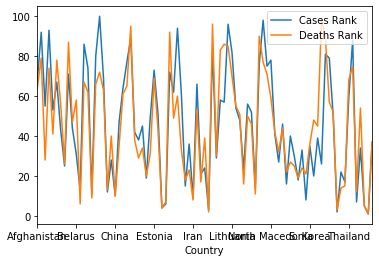

In [46]:
cases_deaths_ranks.plot()

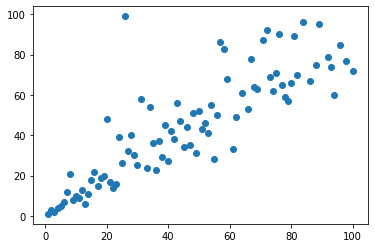

In [47]:
plt.scatter(cases_deaths_ranks['Cases Rank'], cases_deaths_ranks['Deaths Rank'])

In [48]:
cases_deaths_ranks.to_csv("ranks.csv")

In [49]:
round(100*cases.loc['USA']/cases.sum(),2)

Date
2020-02-15     0.02
2020-02-16     0.02
2020-02-17     0.02
2020-02-18     0.02
2020-02-19     0.02
2020-02-20     0.02
2020-02-21     0.05
2020-02-22     0.04
2020-02-23     0.04
2020-02-24     0.07
2020-02-25     0.07
2020-02-26     0.07
2020-02-27     0.07
2020-02-28     0.08
2020-02-29     0.08
2020-03-01     0.09
2020-03-02     0.11
2020-03-03     0.13
2020-03-04     0.17
2020-03-05     0.23
2020-03-06     0.31
2020-03-07     0.41
2020-03-08     0.49
2020-03-09     0.62
2020-03-10     0.84
2020-03-11     1.04
2020-03-12     1.22
2020-03-13     1.51
2020-03-14     1.78
2020-03-15     2.14
2020-03-16     2.53
2020-03-17     3.21
2020-03-18     4.26
2020-03-19     5.68
2020-03-20     7.09
2020-03-21     8.00
2020-03-22    10.02
2020-03-23    11.64
2020-03-24    12.97
2020-03-25    14.52
2020-03-26    16.08
2020-03-27    17.45
2020-03-28    18.64
2020-03-29    19.68
2020-03-30    20.90
2020-03-31    21.94
2020-04-01    23.00
2020-04-02    24.14
2020-04-03    25.23
2020-04-04    2

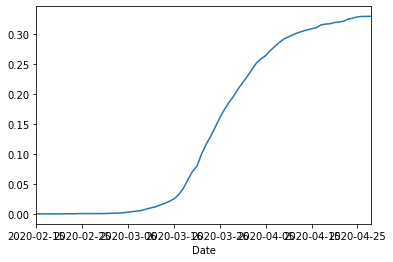

In [50]:
(cases.loc['USA']/cases.sum()).plot()

In [51]:
round(100*deaths.loc['USA']/deaths.sum(),2)

Date
2020-02-15     0.00
2020-02-16     0.00
2020-02-17     0.00
2020-02-18     0.00
2020-02-19     0.00
2020-02-20     0.00
2020-02-21     0.00
2020-02-22     0.00
2020-02-23     0.00
2020-02-24     0.00
2020-02-25     0.00
2020-02-26     0.00
2020-02-27     0.00
2020-02-28     0.00
2020-02-29     0.03
2020-03-01     0.03
2020-03-02     0.19
2020-03-03     0.28
2020-03-04     0.34
2020-03-05     0.35
2020-03-06     0.43
2020-03-07     0.53
2020-03-08     0.58
2020-03-09     0.65
2020-03-10     0.70
2020-03-11     0.82
2020-03-12     0.82
2020-03-13     0.89
2020-03-14     0.98
2020-03-15     1.06
2020-03-16     1.22
2020-03-17     1.38
2020-03-18     1.68
2020-03-19     2.06
2020-03-20     2.24
2020-03-21     2.31
2020-03-22     2.83
2020-03-23     3.37
2020-03-24     4.14
2020-03-25     4.85
2020-03-26     5.40
2020-03-27     6.22
2020-03-28     7.21
2020-03-29     7.31
2020-03-30     8.37
2020-03-31     9.58
2020-04-01    10.82
2020-04-02    11.44
2020-04-03    12.50
2020-04-04    1

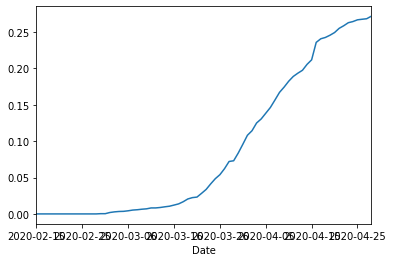

In [52]:
(deaths.loc['USA']/deaths.sum()).plot()